In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from os.path import join 

In [2]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib as mpl

In [34]:
# mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 30

In [5]:
batch1 = pickle.load(open(r'/content/drive/MyDrive//battery capcity estimation//Battery SOH//DATA//MIT data//PKL for data extraction//batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

In [6]:
numBat1 = len(batch1.keys())
numBat1

41

In [7]:
batch2 = pickle.load(open(r'/content/drive/MyDrive//battery capcity estimation//Battery SOH//DATA//MIT data//PKL for data extraction//batch2.pkl','rb'))

In [8]:
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

In [9]:
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

In [10]:
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

In [11]:
numBat2 = len(batch2.keys())
numBat2

43

In [12]:
batch3 = pickle.load(open(r'/content/drive/MyDrive//battery capcity estimation//Battery SOH//DATA//MIT data//PKL for data extraction//batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c38']
del batch3['b3c39']

In [13]:
numBat3 = len(batch3.keys())
numBat3

40

In [14]:
numBat = numBat1 + numBat2 + numBat3
numBat

124

In [15]:
bat_dict = {**batch1, **batch2, **batch3}

In [16]:
len(bat_dict.keys())

124

In [17]:
cell_lst = []
cycle_lst = []
for i in bat_dict.keys():
    cycle_lst.append(bat_dict[i]['cycle_life'].reshape(1)[0])
    if(bat_dict[i]['cycle_life']>1000)&(bat_dict[i]['cycle_life']<1300) :
        print(str(i)+" cycle_life : "+str(bat_dict[i]['cycle_life'].squeeze()))
        cell_lst.append(i)

b1c5 cycle_life : 1074.0
b1c9 cycle_life : 1054.0
b1c23 cycle_life : 1014.0
b1c24 cycle_life : 1017.0
b1c41 cycle_life : 1051.0
b3c0 cycle_life : 1009.0
b3c1 cycle_life : 1063.0
b3c3 cycle_life : 1115.0
b3c4 cycle_life : 1048.0
b3c9 cycle_life : 1039.0
b3c10 cycle_life : 1078.0
b3c18 cycle_life : 1146.0
b3c19 cycle_life : 1155.0
b3c22 cycle_life : 1002.0
b3c26 cycle_life : 1028.0
b3c33 cycle_life : 1284.0
b3c34 cycle_life : 1158.0
b3c35 cycle_life : 1093.0
b3c43 cycle_life : 1046.0


In [18]:
len(cycle_lst)

124

In [19]:
outlier_cell_lst = []
exist_lst = ['b1c1','b1c2','b3c16']
for i in bat_dict.keys():
    if(bat_dict[i]['cycle_life']>1618) :
        print(str(i)+" cycle_life : "+str(bat_dict[i]['cycle_life'].squeeze()))
        if i in exist_lst:
          continue
        else:
          outlier_cell_lst.append(i)

b1c0 cycle_life : 1852.0
b1c1 cycle_life : 2160.0
b1c2 cycle_life : 2237.0
b1c4 cycle_life : 1709.0
b3c7 cycle_life : 1836.0
b3c16 cycle_life : 1638.0
b3c42 cycle_life : 1642.0
b3c45 cycle_life : 1801.0


In [20]:
cell_lst=pd.DataFrame(cell_lst,columns=['cell_name'])
outlier_cell_lst=pd.DataFrame(outlier_cell_lst,columns=['cell_name'])

## 데이터 추가로 불러오기

In [ ]:
sample_cell=cell_lst.sample(2)
sample_cell

In [ ]:
outlier_cell = outlier_cell_lst.sample(2)
outlier_cell

In [ ]:
# import csv

# file_name = "b3c4"

# life = len(bat_dict[file_name]['cycles'])


In [ ]:
# cell_data_f = open('/content/drive/MyDrive//battery capcity estimation//data//'+ file_name + '.csv', 'w', newline='')

# cell_data_wr = csv.writer(cell_data_f)

# cell_data_columns = ["Cycle_Index","Step_Index","Step_Time" ,"Current", "Voltage","Charge_Capacity","Discharge_Capacity"]

# cell_data_wr.writerow(cell_data_columns)

85

In [ ]:
# for i in range(life):
    
#     for j in range (len(bat_dict[file_name]['cycles'][str(i)]['t'])):
    
    
#         cycle = i
#         ind = 10
#         cur = bat_dict[file_name]['cycles'][str(i)]['I'][j]
        
#         cur = cur*1.1
#         vol = bat_dict[file_name]['cycles'][str(i)]['V'][j]
#         t   = bat_dict[file_name]['cycles'][str(i)]['t'][j]
#         t= t*60
#         qc  = bat_dict[file_name]['cycles'][str(i)]['Qc'][j]
#         qd  = bat_dict[file_name]['cycles'][str(i)]['Qd'][j]
    
#         cell_data_wr.writerow([cycle,ind, t, cur, vol, qc, qd])
    
# cell_data_f.close()
    

# discharge curve만 추출

In [ ]:
df = pd.read_csv('/content/drive/MyDrive//battery capcity estimation//data//b3c4.csv')
df

,Cycle_Index,Step_Index,Step_Time,Current,Voltage,Charge_Capacity,Discharge_Capacity
0,0,10,0.0000,0.604073,2.117058,0.000006,5.202480e-07
1,0,10,0.0391,1.036888,2.153300,0.000006,5.202480e-07
2,0,10,0.0839,1.530476,2.206564,0.000006,5.202480e-07
3,0,10,0.1183,1.900528,2.251728,0.000006,5.202480e-07
4,0,10,0.1583,2.331619,2.308858,0.000006,5.202480e-07
...,...,...,...,...,...,...,...
781535,1046,10,2135.9201,0.000000,2.057996,0.880815,8.800147e-01
781536,1046,10,2136.9145,0.000000,2.079636,0.880815,8.800147e-01
781537,1046,10,2137.9151,0.000000,2.099135,0.880815,8.800147e-01
781538,1046,10,2138.9148,0.000000,2.116866,0.880815,8.800147e-01


In [ ]:
df = df.loc[df['Current']<0]

In [ ]:
df.to_csv('/content/drive/MyDrive//battery capcity estimation//data//b3c4.csv',index=False)

## 셀 사이클 분포 확인

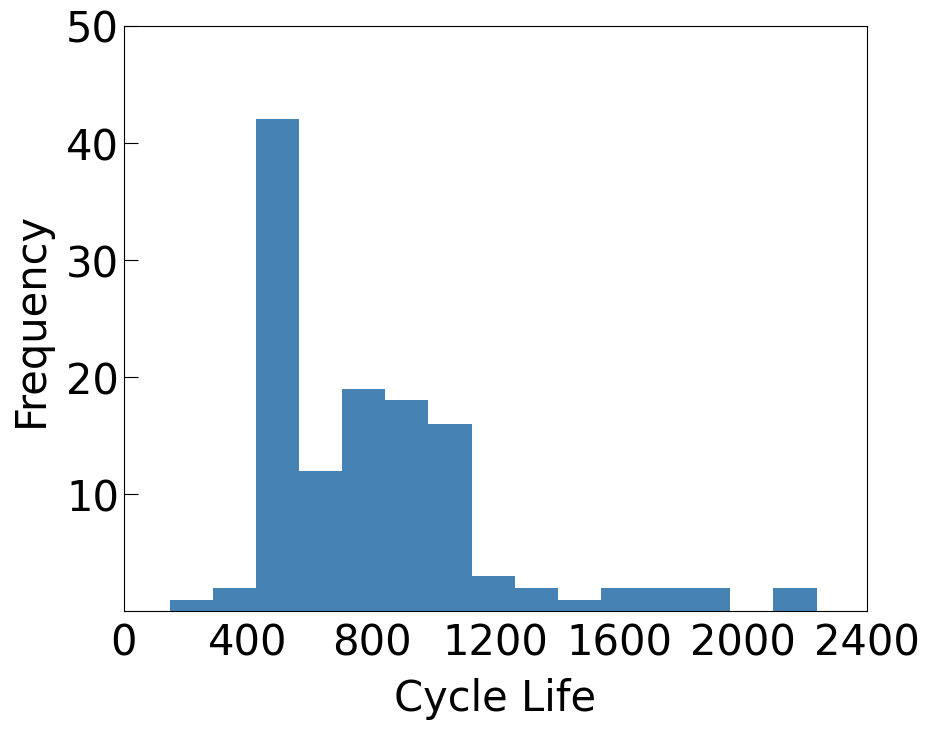

In [44]:
import seaborn as sns
# plt.subplot(2,1,1)
plt.figure(figsize = (10, 8))

# sns.boxplot(x=cycle_lst,width=0.2,color='steelblue')
# plt.axvspan(1435,2400,facecolor='gray',alpha=0.3)
# plt.xticks(np.arange(0,2600,400))
# plt.tick_params(direction='in',length=10) 
# plt.xlabel('Cycle No.',labelpad=10)
# plt.savefig('./box plot.png',dpi=600)

plt.hist(cycle_lst,bins=15,color='steelblue')
plt.xticks(np.arange(0,2600,400))
plt.yticks([10,20,30,40,50])
plt.tick_params(axis='x',which='both', bottom=False,top=False) 
plt.tick_params(axis='y',length=10,direction='in') 
plt.xlabel('Cycle Life',labelpad=10)
plt.ylabel('Frequency',labelpad=10)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/battery capcity estimation/new figure///mit distribution.png',dpi=600)
plt.show()

In [25]:
cycle_lst = pd.DataFrame(cycle_lst,columns=['cycle'])

In [26]:
# iqr 구하는 과정
q3 = cycle_lst.quantile(0.75)
q2 = cycle_lst.quantile(0.5)
q1 = cycle_lst.quantile(0.25)
iqr = q3-q1
print(q3)
print(q2)
print(q1)
print(iqr)

cycle    946.5
Name: 0.75, dtype: float64
cycle    736.5
Name: 0.5, dtype: float64
cycle    498.75
Name: 0.25, dtype: float64
cycle    447.75
dtype: float64


In [27]:
print(q3+1.5*iqr)
print(q1-1.5*iqr)

cycle    1618.125
dtype: float64
cycle   -172.875
dtype: float64


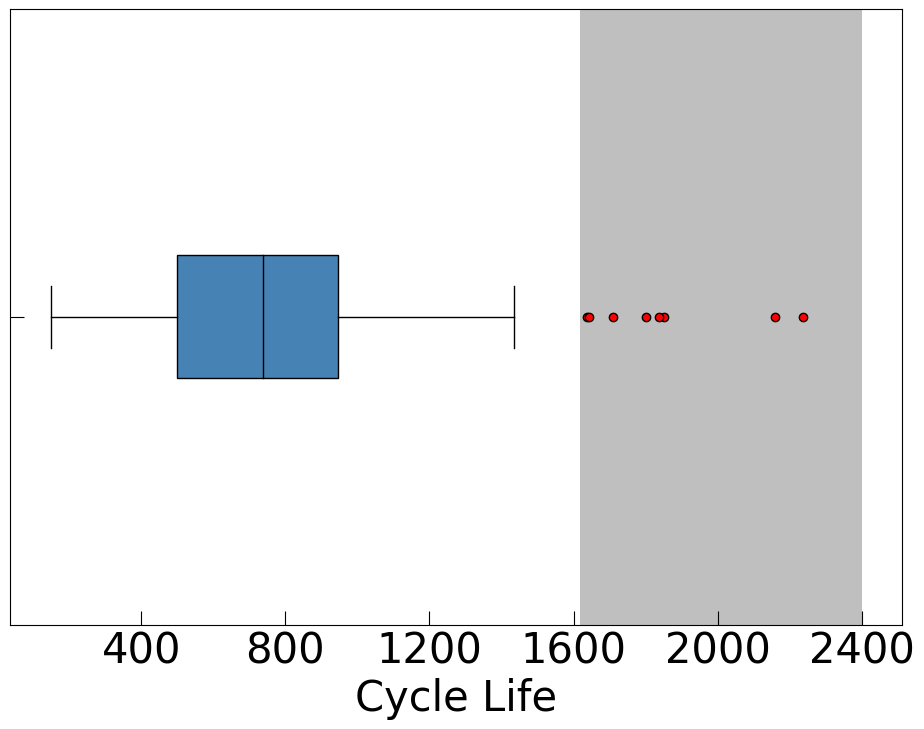

In [40]:
plt.figure(figsize=(10,8))
plt.boxplot(cycle_lst,widths=0.2,patch_artist = True, boxprops=dict(facecolor = 'steelblue',color='black'), # <- 박스의 face와 가장자리 색을 지정
                    medianprops=dict(color='black'),flierprops=dict(markerfacecolor='red')
                    ,labels=[""],vert = 0)
plt.xticks(np.arange(0,2500,400))
plt.axvspan(1618, 2400,alpha=0.5,facecolor='gray')
plt.xlabel('Cycle Life')
plt.tick_params(length = 10, direction = 'in') 
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/battery capcity estimation/new figure//box_plot_cell_cycle.png',dpi=600)
plt.show()

In [ ]:
sample_cell

,cell_name
16,b3c34
3,b1c24


In [ ]:
outlier_cell

,cell_name
4,b3c45
0,b1c0


In [ ]:
a = bat_dict['b1c42']['summary']['cycle']
b = bat_dict['b1c42']['summary']['QD']

In [ ]:
pd.DataFrame(a,b).to_csv(f'./b1c42data.csv')

In [ ]:
plt.plot(bat_dict['b1c42']['summary']['cycle'], bat_dict['b1c42']['summary']['QD'])

In [ ]:
print(bat_dict['b1c31']["cycles"]["0"])

{'I': array([0, 0], dtype=uint64), 'Qc': array([0, 0], dtype=uint64), 'Qd': array([0, 0], dtype=uint64), 'Qdlin': array([0, 0], dtype=uint64), 'T': array([0, 0], dtype=uint64), 'Tdlin': array([0, 0], dtype=uint64), 'V': array([0, 0], dtype=uint64), 'dQdV': array([0, 0], dtype=uint64), 't': array([0, 0], dtype=uint64)}


In [ ]:
a = int(bat_dict['b1c31']["cycle_life"])
print(a)
print(type(a))

876
<class 'int'>


### Train and Test Split
If you are interested in using the same train/test split as the paper, use the indices specified below

In [ ]:
test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
train_ind = np.arange(1,(numBat1+numBat2-1),2)
secondary_test_ind = np.arange(numBat-numBat3,numBat);

In [ ]:
print (test_ind)
print (train_ind)
print (secondary_test_ind)